# Bureau
Der Bureau Datensatz bezieht sich auf historische Daten, welche von einer Wirtschaftsprüfungsgesellschaft vorliegen (Schufa in DE).

## Initialisierung

In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
bureau = pd.read_csv(DATASET_DIR / "bureau.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
description.loc[description['Table']=="bureau.csv", "Row":"Special"]

,Row,Description,Special
125,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau",hashed
126,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application),hashed
127,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
128,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
129,DAYS_CREDIT,How many days before current application did client apply for Credit Bureau credit,time only relative to the application
130,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the time of application for related loan in our sample,NaN
131,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at the time of application in Home Credit,time only relative to the application
132,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of application in Home Credit (only for closed credit),time only relative to the application
133,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample),NaN
134,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit prolonged,NaN


In [5]:
# Function to draw a Piechart
def draw_piechart(arguments):
    fig, ax = plt.subplots(1,len(arguments))
    
    # Handle multiple plots
    try:
        for argument, a in zip(arguments,ax):
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]
            
            a.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False, labeldistance=1.05)
            a.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
            a.set_title(title)
            
    # Handle single plot
    except TypeError:
        for argument in arguments:
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]
            
            ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False)
            ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
            ax.set_title(title)
    
    plt.show()

### Datenaufbereitung

In [6]:
# Schnittmenge zwischen app_train und bureau
# Ergänzt die Variable "TARGET" in dem bureau-Datensatz
bureau = pd.merge(bureau, app_train[["SK_ID_CURR","TARGET"]] ,on="SK_ID_CURR")

# Austausch der numerischen Kategorien durch sprechende, interpretierbare Variablen
bureau["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

# Unterteilung des Datensatzen nach Payback und Default
payback = bureau[bureau["TARGET"] == "Payback"]
default = bureau[bureau["TARGET"] == "Default"]

In [7]:
skip = ["SK_ID_CURR" , "SK_ID_BUREAU", "TARGET"]

In [8]:
n_heads = [element for element in bureau.columns if bureau[element].dtype.name == "object"]
n_heads = [element for element in n_heads if element not in skip]
n = bureau[n_heads]

m_heads = [element for element in bureau.columns if bureau[element].dtype.name != "object"]
m_heads = [element for element in m_heads if element not in skip]
m = bureau[m_heads]

In [9]:
m_heads

['DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'DAYS_CREDIT_UPDATE',
 'AMT_ANNUITY']

In [10]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TARGET
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,Payback
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,Payback
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,Payback
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,Payback
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,Payback


# Metadaten

In [11]:
# Anzahl KN in Application Train
SK_APP = np.array(app_train.SK_ID_CURR)
# Anzahl KN in Bureau
SK_B = np.array(bureau.SK_ID_CURR.unique())
# Anzahl KN aus Bureau die auch in Application Train sind
intersect = np.intersect1d(SK_APP, SK_B)

print(len(SK_APP))
print(len(SK_B))
print(len(intersect))

COL = bureau.columns

# Anzahl von Features in Bureau
print(len(COL)-3) # - "SK_ID_CURR, SK_BUREAU, TARGET"
# Anzahl nominaler Features
print(len(n.columns))
# Anzahl metrischer Features
print(len(m.columns))

307511
263491
263491
15
3
12


# Datenanalyse

### NaN's %

In [12]:
df = bureau
for head in df.columns:
    rate = df[head].isna().sum() / len(df[head]) * 100
    print("%-*s %s" % (30, head, rate))

SK_ID_CURR                     0.0
SK_ID_BUREAU                   0.0
CREDIT_ACTIVE                  0.0
CREDIT_CURRENCY                0.0
DAYS_CREDIT                    0.0
CREDIT_DAY_OVERDUE             0.0
DAYS_CREDIT_ENDDATE            6.08042584409602
DAYS_ENDDATE_FACT              37.170798287069424
AMT_CREDIT_MAX_OVERDUE         64.73273847098766
CNT_CREDIT_PROLONG             0.0
AMT_CREDIT_SUM                 0.00020473273847098768
AMT_CREDIT_SUM_DEBT            15.224881852148842
AMT_CREDIT_SUM_LIMIT           33.417160015696176
AMT_CREDIT_SUM_OVERDUE         0.0
CREDIT_TYPE                    0.0
DAYS_CREDIT_UPDATE             0.0
AMT_ANNUITY                    77.11688533260539
TARGET                         0.0


# Feature Beschreibung Bureau

In [13]:
description.loc[description['Table']=="bureau.csv", "Row":"Special"]

,Row,Description,Special
125,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau",hashed
126,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application),hashed
127,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
128,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
129,DAYS_CREDIT,How many days before current application did client apply for Credit Bureau credit,time only relative to the application
130,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the time of application for related loan in our sample,NaN
131,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at the time of application in Home Credit,time only relative to the application
132,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of application in Home Credit (only for closed credit),time only relative to the application
133,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample),NaN
134,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit prolonged,NaN


## kategorische Variablen

In [14]:
n.head()

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,Closed,currency 1,Consumer credit
1,Active,currency 1,Credit card
2,Active,currency 1,Consumer credit
3,Active,currency 1,Credit card
4,Active,currency 1,Consumer credit


Unter den kategorischen Variablen gibt es nur eine bei der sich die Menge der ausfallenden KN von der der Rückzahlenden KN unterscheiden lässt. Dies ist die Menge der aktiven bzw. abgeschlossen Kredite zum Zeitpunkt der Kreditaufnahme.

In [15]:
result = {
    "head" : [],
    "cat" : [],
    "payback" : [],
    "default" : [],
    "diff" : []
}

for head in n.columns.values:
    df1 = payback[head].value_counts().rename_axis(head).reset_index(name='payback').head()
    df2 = default[head].value_counts().rename_axis(head).reset_index(name='default').head()
    
    df1["payback"] = df1["payback"]/df1["payback"].sum()*100
    df2["default"] = df2["default"]/df2["default"].sum()*100
    
    df = df1.merge(df2, how="outer", on=head)
    
    df["diff"] = (df["default"]-df["payback"])
    
    df = df.sort_values("diff", ascending=False)
    
    for diff in df["diff"]:
        if np.isnan(diff):
            continue
        if diff > 5 or diff < -5:
            row = df.loc[df["diff"] == diff]
            cat = row[head][row[head].index[0]]
            
            result["head"].append(head)
            result["cat"].append(cat)
            result["payback"].append(round(row["payback"].values[0],2))
            result["default"].append(round(row["default"].values[0],2))
            result["diff"].append(round(diff,2))

In [16]:
df = pd.DataFrame(result)
df.sort_values("diff", ascending=False)

,head,cat,payback,default,diff
0,CREDIT_ACTIVE,Active,36.39,43.95,7.56
1,CREDIT_ACTIVE,Closed,63.23,55.54,-7.69


### Credit Active
#### Ist ein vergangener Kredit offen oder geschlossen?
Default hat häufiger aktive Kredite bei anderen KI.
möglicher Grund: größere Geldnot, Kosten erfordern eine höhere Fremdkapitalisierung

### Payback

Closed      854124
Active      491583
Sold          5082
Bad debt        16
Name: CREDIT_ACTIVE, dtype: int64 



### Default

Closed      63609
Active      50336
Sold          571
Bad debt        4
Name: CREDIT_ACTIVE, dtype: int64 



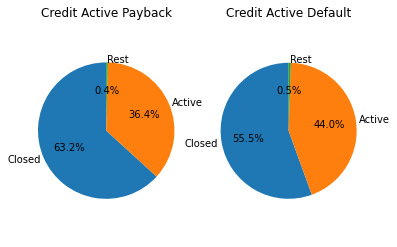

In [17]:
COLUMN_NAME = "CREDIT_ACTIVE"
TITLE = "Credit Active"
LABELS = ["Closed", "Active", "Rest"]
SIZES_PER = lambda x : x / N

count = payback[COLUMN_NAME].value_counts()

N = len(payback[COLUMN_NAME])

a = count["Closed"]
b = count["Active"]
c = N - a - b

SIZES = [a,b,c]

labels1 = LABELS
sizes1 = [SIZES_PER(element) for element in SIZES]
title1 = TITLE + " Payback"

display(Markdown("### Payback"))
print(count, "\n")

count = default[COLUMN_NAME].value_counts()

N = len(default[COLUMN_NAME])

a = count["Closed"]
b = count["Active"]
c = N - a - b

SIZES = [a,b,c]

labels2 = LABELS
sizes2 = [SIZES_PER(element) for element in SIZES]
title2 = TITLE + " Default"

display(Markdown("### Default"))
print(count, "\n")

arguments = [(labels1, sizes1, title1), (labels2, sizes2, title2)]

draw_piechart(arguments)

# Metrische Daten

In [18]:
m.head()

,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,-131,NaN
1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,-20,NaN
2,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,-16,NaN
3,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,-16,NaN
4,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,-21,NaN


### Days Credit
#### Vor wie vielen Tagen (Jahren) wurde laut Wirtschaftsprüfungsgesellschaft ein Kredit aufgenommen?
Defaults bezogen vor kürzerer Zeit einen Kredit
- kurzfristige Zahlungsnot
- Unerfahrene Kreditnehmer

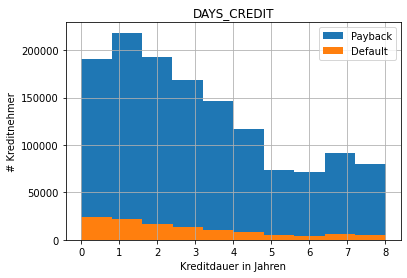

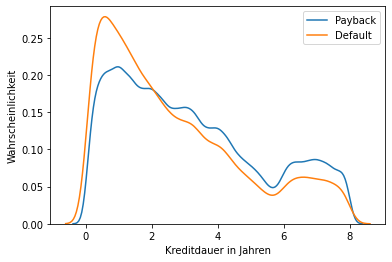

In [20]:
head = "DAYS_CREDIT"

pb = payback[head].copy()
df = default[head].copy()

pb /= -365
df /= -365

pb.hist()
df.hist()
plt.title(head)
plt.legend(labels=["Payback","Default"])
plt.xlabel("Kreditdauer in Jahren")
plt.ylabel("# Kreditnehmer")
plt.show()

sns.kdeplot(pb).get_lines()[0].get_data()
sns.kdeplot(df).get_lines()[1].get_data()
plt.legend(labels=["Payback","Default"])
plt.xlabel("Kreditdauer in Jahren")
plt.ylabel("Wahrscheinlichkeit")
plt.show()

In [21]:
display(Markdown("### Payback"))
pb = payback["DAYS_CREDIT"].mean()
pb /= -365
print(pb, "\n")

display(Markdown("### Default"))
df = default["DAYS_CREDIT"].mean()
df /= -365
print(df)

### Payback

3.1724363103016247 



### Default

2.669776960655314


Zurückzahlende Kunden bezogen bereits durchschnittlich 3.17 Jahre zuvor einen anderen Kredit.

Ausfallende Kunden bezogen bereits durchschnittlich 2.67 Jahre zuvor einen anderen Kredit.

### Credit Days Overdue
#### Wie viele Tage (Jahre) hat ein Kreditnehmer Kredite überzogen?

Dichtefunktion zeigt geringe Unterscheidungsfähigkeit anhand des Parameters. -> eher streichen

In der Vergangenheit haben Paybacks deutlich häufiger Kredite überzogen.
Gründe:
- größeres Vertrauen
- längere Kredithistorie

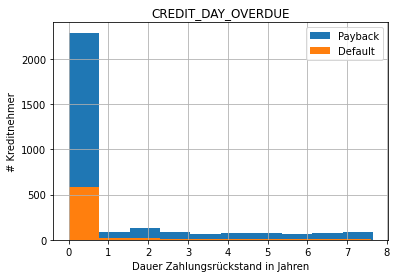

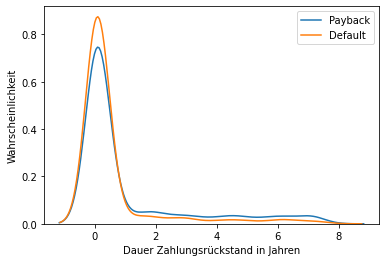

In [22]:
head = "CREDIT_DAY_OVERDUE"

pb = payback[payback["CREDIT_DAY_OVERDUE"] > 0]["CREDIT_DAY_OVERDUE"].copy()
df = default[default["CREDIT_DAY_OVERDUE"] > 0]["CREDIT_DAY_OVERDUE"].copy()

pb /= 365
df /= 365

pb.hist()
df.hist()
plt.title(head)
plt.legend(labels=["Payback","Default"])
plt.xlabel("Dauer Zahlungsrückstand in Jahren")
plt.ylabel("# Kreditnehmer")
plt.show()

sns.kdeplot(pb).get_lines()[0].get_data()
sns.kdeplot(df).get_lines()[1].get_data()
plt.legend(labels=["Payback","Default"])
plt.xlabel("Dauer Zahlungsrückstand in Jahren")
plt.ylabel("Wahrscheinlichkeit")
plt.show()

In [23]:
display(Markdown("### Payback"))
print(pb.mean(), "\n")

display(Markdown("### Default"))
print(df.mean())

### Payback

1.049114402317604 



### Default

0.5750299340436327


In der Vergangenheit überzogen zurückzahlende Kreditnehmer ihre Kredite um 1.049 Jahre.

In der Vergangenheit überzogen ausfallende Kreditnehmer ihre Kredite um 0.57 Jahre.

### Credit Sum

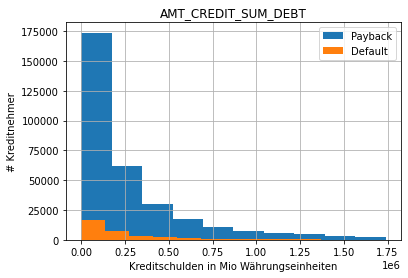

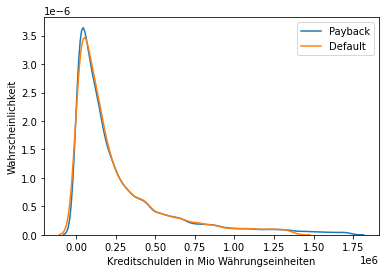

In [24]:
head = "AMT_CREDIT_SUM_DEBT"

pb = payback[payback["AMT_CREDIT_SUM_DEBT"] > 0]["AMT_CREDIT_SUM_DEBT"].copy()
df = default[default["AMT_CREDIT_SUM_DEBT"] > 0]["AMT_CREDIT_SUM_DEBT"].copy()

pb = pb[pb < pb.quantile(0.95)]
df = df[df < df.quantile(0.95)]

pb.hist()
df.hist()

plt.title(head)
plt.legend(labels=["Payback","Default"])
plt.xlabel("Kreditschulden in Mio Währungseinheiten")
plt.ylabel("# Kreditnehmer")
plt.show()

sns.kdeplot(pb).get_lines()[0].get_data()
sns.kdeplot(df).get_lines()[1].get_data()
plt.legend(labels=["Payback","Default"])
plt.xlabel("Kreditschulden in Mio Währungseinheiten")
plt.ylabel("Wahrscheinlichkeit")
plt.show()

In [25]:
display(Markdown("### Payback"))
print(pb.mean(), "\n")

display(Markdown("### Default"))
print(df.mean())

### Payback

276368.93401490327 



### Default

251536.23515745392


Zurückzahlende Kunden haben durchschnittlich Finanzmittel aus anderen Krediten in Höhe von 465.329,86.

Ausfallende Kunden haben durchschnittlich Finanzmittel aus anderen Krediten in Höhe von 384.614,61.

In [26]:
bureau[["SK_ID_CURR", "SK_ID_BUREAU"] + n_heads].head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,215354,5714462,Closed,currency 1,Consumer credit
1,215354,5714463,Active,currency 1,Credit card
2,215354,5714464,Active,currency 1,Consumer credit
3,215354,5714465,Active,currency 1,Credit card
4,215354,5714466,Active,currency 1,Consumer credit


In [27]:
bureau[m_heads].head()

,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,-131,NaN
1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,-20,NaN
2,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,-16,NaN
3,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,-16,NaN
4,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,-21,NaN
